<a href="https://colab.research.google.com/github/JoySoon/Bdata23_MachineLearningProject/blob/main/2023/03/%EA%B0%95%EC%82%AC%EB%8B%98%2020%ED%8C%8C%EC%9D%BC/ML/ML_NB_Korean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
import pandas as pd

# https://github.com/e9t/nsmc/
file_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt'
df = pd.read_csv(file_url, sep='\t', index_col=0)
df.head()

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [ ]:
df[df.document.isnull()]

,document,label
id,,
6369843,NaN,1
511097,NaN,1
2172111,NaN,1
402110,NaN,1
5942978,NaN,0
5026896,NaN,0
1034280,NaN,0
1034283,NaN,0


In [ ]:
df2 = df.dropna()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   document  199992 non-null  object
 1   label     199992 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [ ]:
df3 = pd.concat([df2.head(1000), df2.tail(1000)])
df3

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...
8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
3302770,쓰.레.기,0
5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0


# 전처리

In [ ]:
sample_text = df3.document.iloc[0]
sample_text

'어릴때보고 지금다시봐도 재밌어요ㅋㅋ'

In [ ]:
# https://konlpy.org/ko/latest/index.html
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 19.8 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

In [ ]:
sample_text, okt.nouns(sample_text)

('어릴때보고 지금다시봐도 재밌어요ㅋㅋ', ['때', '보고', '지금', '다시'])

In [ ]:
#  df3['nouns'] = df3.document.apply(okt.nouns)
df3['nouns'] = df3.document.apply(okt.nouns).apply(
    lambda nouns: [n for n in nouns if len(n) >= 2])

In [ ]:
df3.nouns

id
8112052                                          [보고, 지금, 다시]
8132799     [디자인, 학생, 외국, 디자이너, 일군, 전통, 통해, 발전, 문화, 산업, 사실...
4655635                             [폴리스스토리, 시리즈, 부터, 하나, 최고]
9251303                              [연기, 진짜, 생각, 몰입, 진짜, 영화]
10067386                                   [안개, 밤하늘, 초승달, 영화]
                                  ...                        
8963373                                             [포켓, 몬스터]
3302770                                                    []
5458175                       [완전, 사이코, 영화, 마지막, 더욱더, 영화, 린다]
6908648                                       [라따뚜이, 스머프, 런가]
8548411                                      [저그, 영차, 영차, 영차]
Name: nouns, Length: 2000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(df3.nouns.apply(" ".join))
cv.vocabulary_

In [ ]:
x = cv.transform(df3.nouns.apply(" ".join))
print(x)

In [ ]:
from sklearn.model_selection import train_test_split

y = df3.label
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, pred)

0.656

In [ ]:
print(confusion_matrix(y_test, pred))

[[158 100]
 [ 72 170]]


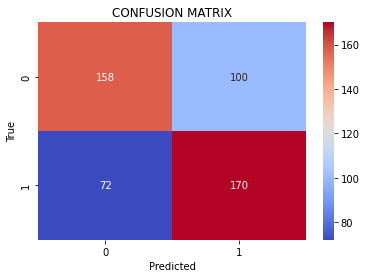

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, pred), cmap='coolwarm', annot=True, fmt='.0f')
plt.title("CONFUSION MATRIX")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## Mecab

In [ ]:
# 설치 후 '런타임 > 런타임 다시 시작'!
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-10 05:33:55--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-10 05:33:55--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7f691009157e098722df0149c3.dl.dropboxusercontent.com/cd/0/get/BwdPeBNCPYtoU5NI5fUruMAZAe1Vq1V0fhqjXR_0OhetoaxaPmTMi_vyL104UhvC9Rrv1SaxSutcdctq1zWAJWKeMtO8nPJtJaJWeQ6poBdb7CgHbA2GmnLaEGs4a7NzUUK-UWT-aEfQ18B4B0DXKVymb6rP5RLYHZDB6h8UWMMaJ62yP2-pJUlmtx4xeH1PEpY/file?dl=1# [following]
--2022-11-10 05:33:56--  https://uc7f691009157e098722df0149c3.dl.dropboxusercontent.com/cd/0/get/BwdPeBNCPYto

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()

In [ ]:
import pandas as pd

# https://github.com/e9t/nsmc/
file_url = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt'
df = pd.read_csv(file_url, sep='\t', index_col=0)
df.head()

,document,label
id,,
8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
df.dropna(inplace=True)
df2 = pd.concat([df.head(1000), df.tail(1000)])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 8112052 to 8548411
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  2000 non-null   object
 1   label     2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.9+ KB


0.678


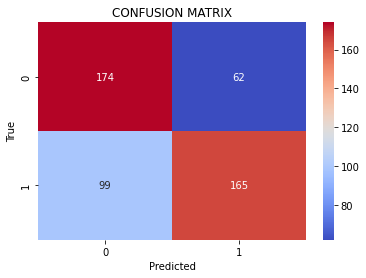

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def handle_naive_bayes(df: pd.DataFrame, tagger):
    nouns = df.document.apply(tagger).apply(" ".join)
    cv = CountVectorizer()
    x = cv.fit_transform(nouns)
    y = df.label
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    model = MultinomialNB()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(accuracy_score(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred),
                cmap='coolwarm', annot=True, fmt='.0f')
    plt.title("CONFUSION MATRIX")
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

handle_naive_bayes(df2, mecab.nouns)

# Khaiii (카카오)

In [ ]:
# https://github.com/kakao/khaiii
!git clone https://github.com/kakao/khaiii.git
!pip install cmake
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

Cloning into 'khaiii'...
remote: Enumerating objects: 1024, done.
remote: Total 1024 (delta 0), reused 0 (delta 0), pack-reused 1024
Receiving objects: 100% (1024/1024), 33.03 MiB | 25.72 MiB/s, done.
Resolving deltas: 100% (438/438), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detec

In [ ]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

In [ ]:
for word in api.analyze("안녕, 세상."):
    print(word)

안녕,	안녕/IC + ,/SP
세상.	세상/NNG + ./SF


In [ ]:
for word in api.analyze("안녕, 세상."):
    print(word.morphs[0])

안녕/IC
세상/NNG
